# Hartree Fock (WORK IN PROGRESS)

This project uses the Hartree-Fock method to describe simple atoms and molecules. This project used (Thijssen, 2013, p. 43) as a guide, though it goes further than the problems specified in the book. 

## Theory

### Basic approach

The full Hamiltonian of a molecular system is given by $(1)$.

$$
\hat{H} = \sum^N_{i=1}\frac{\hat{p}_i^2}{2} + \sum^K_{n=1} \frac{\hat{P}_n^2}{2M_n} + \frac{1}{2}\sum^N_{i=1}\sum^N_{i\neq j}\frac{1}{|\vec{r}_i - \vec{r}_j|} - \sum^N_{i=1}\sum^K_{n=1}\frac{Z_n}{|\vec{r}_i - \vec{R}_n|} + \frac{1}{2}\sum^K_{n=1}\sum^K_{m\neq n}\frac{Z_n Z_m}{|\vec{R}_n - \vec{R}_m|}\tag{1}
$$

One of the main problems in molecular physics is to find the eigenstates of $(1)$. It turns out that in most cases analytical solutions are not possible, meaning numerical methods need to be applied.

The Hartree-Fock method is a possible numerical method. It uses the Born-Oppenheimer approximation to decouple the electron and nuclei parts (Griffiths, 2018, p. 428),  guesses that the eigenstate is a Slater determinant (Thijssen, 2013, p. 53) and applies variational methods to find an upper bound of the eigenstates. This process reduces $(1)$ to $N$ equations in the form:

$$\hat{F}\psi_k(\vec{r},m_s) = \epsilon_k\psi_k(\vec{r},m_s)\tag{2}$$

where $\psi_k(\vec{r},m_s)$ is a component of the Slater determinant, $\hat{F}$ is called the Fock operator (derived in  (Thijssen, 2013, p. 56)) and $\epsilon_k$ is related to the energy of the total eigenstate.

$\hat{F}$ contains $\psi_k(\vec{r},m_s)$ terms in its definition, meaning $(2)$ forms a self-consistency equation. This means $(2)$ does not take the form of an eigen-equation, making it much harder to solve.


To solve (2), the variational method is applied again. An upper bound of the total electron energy can then be deduced from $(3)$.

$$E = \frac{1}{2}\sum\limits^N_{k=1}\epsilon_k + \bra{\psi_k}-\frac{\nabla^2}{2} + \sum_n\frac{Z_n}{|\vec{r}-\vec{R}_n|}\ket{\psi_k}\tag{3}$$

This entire process is the Hatree-Fock method.

### Variational method for the Fock Equation

For the second application of the variational method, the general form of $\psi_k(\vec{r},m_s)$ is guessed. For atomic systems, the most natural guess is a linear combination of Slater-type orbitals (STO). These take the form of $(4)$ (Slater, 1930, p.57).

$$
\psi_k(\vec{r},m_s) = \sum\limits_n A_n     r^{n-1}e^{-a_nr}Y_{lm}(\theta,\phi)\chi_{m_s}\tag{4}
$$

The coefficients $a_n,A_n$ are then varied to find the stationary $\epsilon_k$; this corresponds to an upper bound of the eigenstate.

However, due to integrals involving STO being hard to calculate, its usually easier to use Gaussian-type orbitals (GTO) (Goings, 2017). These take the form of $(5)$.

$$
\psi_k(x,y,z,m_s) = \sum\limits_{ijk} A_{ijk} x^iy^jz^ke^{-\alpha_{ijk}(x^2 + y^2 + z^2)}\chi_{m_s}\tag{5}
$$  

Again, the coefficients $a_{ijk},A_{ijk}$ are then varied to find the stationary $\epsilon_k$. 

Whatever basis is chosen, the effect is to transform the problem into a non-linear variational problem. While this can be solved directly, if the $\alpha_{ijk}$ terms are deduced by some other method, the problem becomes resolvable by (easier) linear methods. This is typically done by either fitting a set of GTOs to an appropriate STO or solving a simpler but appropriate non-linear problem (Thijssen, 2013, p. 67). This project doesn't cover these methods, it only considers the linear method. The $\alpha_{ijk}$ coefficients used are taken from (Thijssen, 2013, p. 35, p. 50) and (MolSSI, 2020).

Given the $\alpha_{ijk}$ terms, the variational problems can then be written in matrix form as:

$$F^+C_k^+ = \epsilon_k^+SC_k^+,F^-C_k^- = \epsilon_k^-SC_k^-\tag{5}$$

where $F_{nm}^{\pm}$ are the matrix elements for the plus/minus parts of the GTO, $S$ is the GTO overlap matrix and $C_k^{\pm}$ is the representation of $\psi_k(\vec{r},\pm\frac{\hbar}{2})$ in the GTO basis (Thijssen, 2013, p. 64).

This equation can then be solved iteratively. $F$ is deduced for an initial guess of the $\psi_k(\vec{r},m_s)$ 's and the generalised eigenvalue problem is solved. This process is then repeated, using the $\psi_k(\vec{r},m_s)$ terms found as the initial guess, until the solution converges. These solutions can then be used to deduce an upper bound of the eigenstate.

## Implementation

As any basis can be chosen for variational solutions to $(4)$, the matrix elements required to form equation $(5)$ are described in an abstract class called Representation. A subclass of Representation then corresponds to a certain basis. Two subclasses are defined: Rep1sGTO only uses the 1s Gaussian basis and RepGTO considers the general Gaussian basis. In principle, other bases could be added (eg. STO), however this is not implemented here. The matrix elements required for Rep1sGTO are defined in GTO1s_matrix_elements.py; for a derivation of these elements, see (Thijssen, 2013, p. 64). The matrix elements required for RepGTO are found with code taken from (Goings, 2017). These matrix elements are defined in MolecularIntegrals.py.

In terms of the actual algorithm, this is implemented in Hartee_Fock.py as a recursive function called iterateHF. The eigenstate that is being calculated is determined by the getTargetEigStates function that is a parameter of iterateHF.

## Results

Some simple examples of the simulation are given in hartree-fock-calculations.ipynb. Some of the ground state energies found are given in the table below.

|  Atom/Molecule   | HTF Energy (hartree) |Experimental Energy (hartree)|
| -------- | ------- | -----|
| $He$  | -2.855    | -2.862 |
| $Li$ | -7.410 | -7.479
| $O$    | -74.582    | -75.113

Molecular parameters (like bond length) can also be deduced by finding the parameter than minimises the total energy (this is effective as at this level of approximation molecular energy states seem continuous). In hartree-fock-calculations.ipynb, $H_2$ and $H_2O$ are considered. For $H_2$, the bond length found was $1.388$ au. The experimental result is 1.401 au. For $H_2O$, the bond length found was 1.817 au and the angle between bonds found was 107.227 degrees. The experimental values are 1.809 au and 104.5 degrees.

# Stuff to do

- Modify notes above to make sense in this notebook (add notes on contracted bases and how alphas are deduced)
- Need to go over different basis sets and explain advantages.
- Pople convention is followed in most cases (Ditchfield, R., Hehre, W., & J.Pople. (1970). Self-Consistent Molecular Orbital Methods. VI. Energy Optimized. The Journal of Chemical Physics, 5001-5006.). Explain.
- Clean up code below
- look at Kopmann theorm, specra diagrams
- look at Generalized X-Ray Scattering Factors ROBERT F. STEWART
- using Hartree-Fock approximation to calculate cross-sections due to molecules (Born approx and quantum scattering program?)
- more applications (calculation dipole moments + limits to method + ...)
- hartree-fock visualisation by density plots (use mesh method and add getValue(x,y,z) to GTO and CGTO)


This program will work with every atom except for hydrogen, the ups and downs then can't be filled creating problems.

In [1]:
from Hartree_Fock import *
from representation import *
from get_GTOs_from_BSE import *
from scipy.optimize import fmin
from GTOs import *
import matplotlib.pyplot as plt

In [22]:
def zPlaneDensityPlot(low,high,N,electrons,GTOs,atomName):
    x = np.linspace(low, high, 2*N+1)
    y = np.linspace(low, high, 2*N+1)
    z = np.linspace(low, high, 2*N+1)
    xv, yv, zv = np.meshgrid(x, y, z)

    density = getDensity(xv, yv, zv, electrons, GTOs) 

    title = atomName.rstrip() + " electron density in z=0 plane"
    plt.imshow(density[:,:,N], extent = [low, high, low, high],cmap="jet")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

## Helium

Alpha values were taken from (Thijssen, 2013,p. 50).


In [23]:
#sets up 3ZaPa-NR-CV Helium basis set (should be better for excited states)
GTOsHe = getGuassians("4ZaPa-NR-CV", 2, np.zeros(3), basisType="primitive")

#simulation parameters
Zs = [2]
nucPos = [np.array([0, 0, 0])]
maxError = 1E-4

#define representation class
rep = RepGTO(GTOsHe, Zs, nucPos)

#define intial guess
ups = rep.normaliseList([[1 for i in range(len(GTOsHe))]])
downs = rep.normaliseList([[1 for i in range(len(GTOsHe))]])
EGuess = -2.8

E1s1s_S, HeElec1s1s_S = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeGroundEigStates(s,2))
E1s2s_T, HeElec1s2s_T = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeLthExcitedSpin(s,2,0,"up"))
E1s2p_T, HeElec1s2p_T = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeLthExcitedSpin(s,2,1,"up"))
E1s2s_S, HeElec1s2s_S = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeLthExcitedSpin(s,2,1,"down"))
E1s2p_S, HeElec1s2p_S = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeLthExcitedSpin(s,2,2,"down"))

In [44]:
# As only one electron is being shifted for the states generated here the independent electron labelling will 
# take the form (1s ...). (meaning the labels can be deduced by looking at spin, symetry of the density plot
# and energy). The states above have been labelled by this process.

#data should be similar to https://quantummechanics.ucsd.edu/ph130a/130_notes/node374.html
#need to look at differences in Gaussian basis sets: davidson-feller-2002-basis-set-selection-for-molecular-calculations.pdf
#for p states basis sets energies are very inaccurate, though the simulation predicts the correct symetries
#(may want to look at higher order just to get an idea of there form)

#energy levels found are E1s1s_S, E1s2s_T, E1s2p_T, E1s2s_S, E1s2p_S; as running accurately takes to long
EHe = [-2.8616762236033466,-2.169773174025698,-1.985953243413748,-2.1668064584093205,-1.9638361735952967]

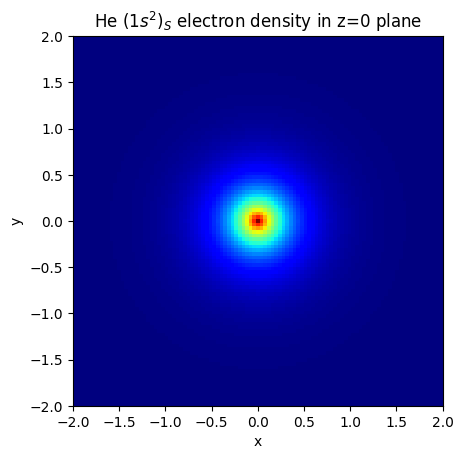

In [49]:
#asymetries tend to be hard to see for the intial excited states, [-4,4] size tends to be the best size 
zPlaneDensityPlot(-2,2,50,HeElec1s1s_S,GTOsHe,r"He $(1s^2)_S$")

In [5]:
#same calculation but with contracted set

#sets up 2ZaPa-NR-CV Helium basis set
CGTOsHe = getGuassians("2ZaPa-NR-CV", 2, np.zeros(3), basisType="contracted")

#simulation parameters
Zs = [2]
nucPos = [np.array([0, 0, 0])]
maxError = 1E-4

#define representation class
rep = RepCGTO(CGTOsHe, Zs, nucPos)

#define intial guess
ups = rep.normaliseList([[1 for i in range(len(CGTOsHe))]])
downs = rep.normaliseList([[1 for i in range(len(CGTOsHe))]])
EGuess = -2.8

#run simulation and print energy
E, HeElectrons = iterateHF(ups,downs,rep,EGuess,maxError,lambda s: takeGroundEigStates(s,2))
print(f"Energy: {E} (hartree)")

Energy: -2.784164237157625 (hartree)


## $H_2$ molecule

This code defines a function that finds the ground state energy for a given bond length of $H_2$ (uses alpha values from (Thijssen, 2013,p. 35)). It then minimises this function to find an approximation for the bond length and ground state energy (this is a valid argument as at this level of approximation as the nuclear energies appear continuous).


In [21]:
def findH2Ground(bondLength):
    """
    Function that returns the ground state energy, electron states and GTOs for a given bound length
    """
    #defines simulation parameters
    posH1 = np.array([-bondLength[0]/2, 0, 0])
    posH2 = np.array([bondLength[0]/2, 0, 0])
    GTOsH2 = getGuassians("6-21G", 1, posH1, basisType="primitive") + getGuassians("6-21G", 1, posH2, basisType="primitive")
    nucPos = [posH1,posH2]
    Zs = [1,1]
    maxError = 1E-4

    #defines representation
    rep = Rep1sGTO(GTOsH2, Zs, nucPos)
    
    #defines intial guess
    ups = rep.normaliseList([[1 for i in range(len(GTOsH2))]])
    downs = rep.normaliseList([[1 for i in range(len(GTOsH2))]])
    EGuess = 0 

    #finds total molecular energy
    E_el, H2Electrons = iterateHF(ups, downs, rep, EGuess, maxError, lambda s: takeGroundEigStates(s,2))
    E = 1/bondLength[0]

    #returns total molecular energy
    return E_el + E, H2Electrons, GTOsH2

def findH2GroundEnergy(bondLength):
    """
    Function that returns the ground state energy for a given bound length
    """
    E, H2Electrons, GTOsH2 = findH2Ground(bondLength)
    return E

#finds the min bound length a prints 
minBoundLength = fmin(findH2GroundEnergy,1.6)
print(f"Bound length: {minBoundLength} au")


Optimization terminated successfully.
         Current function value: -1.122965
         Iterations: 13
         Function evaluations: 26
Bound length: [1.38867188] au


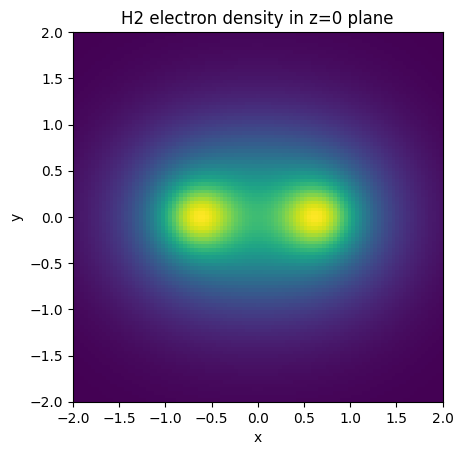

In [23]:
#density plot
E, H2Electrons, GTOsH2 = findH2Ground([1.3887])
zPlaneDensityPlot(-2,2,50,H2Electrons,GTOsH2,"H2")

## Li

This code finds the ground state energy of Li. Uses alphas from (MolSSI, 2020).

In [25]:
#sets up 6-21G lithium basis set
GTOsLi = getGuassians("6-21G", 3, np.zeros(3), basisType="primitive")

#sets up simulation parameters
Zs = [3]
nucPos = [np.array([0,0,0])]
maxError = 1E-4

#sets up representation
rep = RepGTO(GTOsLi, Zs, nucPos)

#sets up guess  
g = [1 for i in range(len(GTOsLi))]
ups = [g]
downs = [g,g]
EGuess = -7.5

#finds ground state and prints
E,LiElectrons = iterateHF(rep.normaliseList(ups), rep.normaliseList(downs), rep, EGuess,
                          maxError, lambda s: takeGroundEigStates(s,3))
print(f"Energy: {E} (hartree)")

Energy: -7.4312433097108554 (hartree)


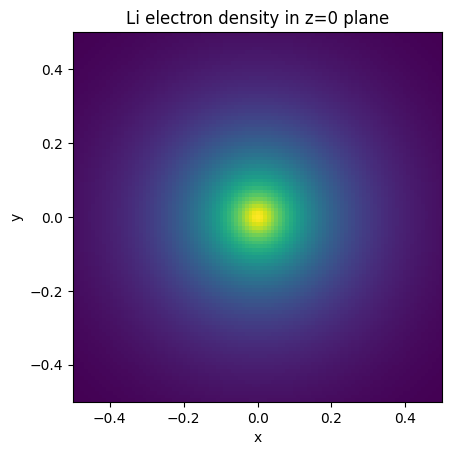

In [30]:
zPlaneDensityPlot(-0.5,0.5,50,LiElectrons,GTOsLi,"Li")

### O

This code finds the ground state energy of O. Uses alphas from (MolSSI, 2020).

In [27]:

#sets up 6-21G set for oxygen
nullVec = np.array([0,0,0])
alphaS = [0.5472270000E+04,0.8178060000E+03,0.1864460000E+03,0.5302300000E+02,0.1718000000E+02,0.5911960000E+01,0.7402940000E+01,0.1576200000E+01,0.3736840000E+00]
typeS = [nullVec for i in range(9)]
baisS = [nullVec for i in range(9)]
alphaP = [0.7402940000E+01,0.1576200000E+01,0.3736840000E+00]
basisP = [nullVec for i in range(3)]
typePx = [np.array([1,0,0]),np.array([1,0,0]),np.array([1,0,0])]
typePy = [np.array([0,1,0]),np.array([0,1,0]),np.array([0,1,0])]
typePz = [np.array([0,0,1]),np.array([0,0,1]),np.array([0,0,1])]
alphas =  alphaS +  alphaP + alphaP + alphaP
basisPos = baisS +  basisP + basisP + basisP
type = typeS + typePx + typePy + typePz

#sets up simulation parameters
Zs = [8]
nucPos = [np.array([0,0,0])]
maxError = 1E-4

#sets up representation
rep = RepGTO(Zs,alphas,nucPos,basisPos,type)

#sets up intial guess  
g =[1 for i in range(1,19)]
ups = [g,g,g,g]
downs = [g,g,g,g]
EGuess = 0

#finds energy and prints
E,state = iterateHF(rep.normaliseList(ups),rep.normaliseList(downs),rep,EGuess,maxError,lambda s: takeGroundEigStates(s,8))
print(f"Energy: {E} (hartree)")

Energy: -74.58247930422125 (hartree)


### $H_2O$ 

This code performs uses the same method as the $H_2$ section to find the $H_2O$ bond length and the angle between the two hydrogen bonds. Alphas are taken from (Thijssen, 2013, p. 35) and (MolSSI, 2020).

In [28]:
nullVec = np.array([0,0,0])

def findGround(params):
    """"
    Function that takes in a numpy array of [bound length,theta] and returns its energy.
    """
    #finds atom positions
    bondLength = params[0]
    theta = params[1]
    posH1 = np.array([0,0,0])
    posH2 = np.array([bondLength*(np.cos(theta)-1),bondLength*np.sin(theta),0])
    posOx = np.array([-bondLength,0,0])

    #sets up simulation parameters for oxygen, uses 6-21G set for oxygen
    alphaS = [0.5472270000E+04,0.8178060000E+03,0.1864460000E+03,0.5302300000E+02,0.1718000000E+02,0.5911960000E+01,0.7402940000E+01,0.1576200000E+01,0.3736840000E+00]
    typeS = [nullVec for i in range(9)]
    baisS = [posOx for i in range(9)]

    alphaP = [0.7402940000E+01,0.1576200000E+01,0.3736840000E+00]
    basisP = [posOx for i in range(3)]
    typePx = [np.array([1,0,0]) for i in range(3)]
    typePy = [np.array([0,1,0]) for i in range(3)]
    typePz = [np.array([0,0,1]) for i in range(3)]


    #sets up simulation parameters for oxygen
    alphasH = [13.00773,1.962079,0.444529,0.1219492]
    typeH = [nullVec for i in range(4)]
    basisH1 = [posH1 for i in range(4)]
    basisH2 = [posH2 for i in range(4)]

    #combines simulation parameters
    alphas =  alphaS +  alphaP + alphaP + alphaP + alphasH + alphasH
    basisPos = baisS +  basisP + basisP + basisP + basisH1 + basisH2
    type = typeS + typePx + typePy + typePz + typeH + typeH

    #sets up simulation parameters
    Zs = [8,1,1]
    nucPos = [posOx,posH1,posH2]
    maxError = 1E-4

    #defines representation
    rep = RepGTO(Zs,alphas,nucPos,basisPos,type)

    #defines guess
    g1 =[1 for i in range(18)] + [0 for i in range(8)]
    g2 =[0 for i in range(18)] + [1 for i in range(8)]
    ups = [g1,g1,g1,g1,g2]
    downs = [g1,g1,g1,g1,g2]
    EGuess = 0

    #finds energy and returns 
    E,state = iterateHF(rep.normaliseList(ups),rep.normaliseList(downs),rep,EGuess,maxError,lambda s: takeGroundEigStates(s,10))
    return E + 16/bondLength + 1/(bondLength*np.sqrt(2-2*np.cos(theta)))


[boundLength,theta] = fmin(findGround,np.array([1.795,1.824]))
print(f"Bound length: {boundLength} au")
print(f"Theta: {180*theta/np.pi} degrees")

Optimization terminated successfully.
         Current function value: -75.897359
         Iterations: 24
         Function evaluations: 48
Bound length: 1.8169275497809068 au
Theta: 107.22733382325602 degrees


## References

Thijseen J., 2013. Computational Physics. Cambridge: Cambridge University Press

Griffiths D., 2018. Introduction To Quantum Mechanics.  Cambridge: Cambridge University Press

Slater J., 1930. Atomic Shielding Constants. Physical Review: Volume 36

Goings, J., 2017. joshuagoings. [Online] 
Available at: https://joshuagoings.com/2017/04/28/integrals/
[Accessed 17 June 2024].

The Molecular Sciences Software Institute (MolSSI), V. T., 2020. Basis Set Exchange. [Online] 
Available at: https://www.basissetexchange.org/
[Accessed 17 June 2024].
